In [146]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import svm

In [2]:
df = pd.read_csv('../downloads/Airline.csv',index_col=[0])
df

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

In [4]:
df = df.dropna()

In [147]:
warnings.filterwarnings('ignore')
df.drop(['age','departure_arrival_time_convenient','gate_location','flight_distance','arrival_delay_in_minutes'],axis=1,inplace=True)

KeyError: "['age' 'departure_arrival_time_convenient' 'gate_location'\n 'flight_distance' 'arrival_delay_in_minutes'] not found in axis"

In [84]:
df

,Gender,customer_type,type_of_travel,customer_class,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction,departure_delay
0,Male,Loyal Customer,Personal Travel,Eco Plus,Neutral,Neutral,Very satisfied,Neutral,Very satisfied,Very satisfied,satisfied,Neutral,satisfied,satisfied,Very satisfied,Very satisfied,25,dissatisfied,30m
1,Male,disloyal Customer,Business travel,Business,Neutral,Neutral,Very unsatisfied,Neutral,Very unsatisfied,Very unsatisfied,Very unsatisfied,Very satisfied,Neutral,Very unsatisfied,satisfied,Very unsatisfied,1,dissatisfied,10m
2,Female,Loyal Customer,Business travel,Business,unsatisfied,unsatisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,satisfied,Neutral,satisfied,satisfied,satisfied,Very satisfied,0,satisfied,0
3,Female,Loyal Customer,Business travel,Business,unsatisfied,Very satisfied,unsatisfied,unsatisfied,unsatisfied,unsatisfied,unsatisfied,Very satisfied,Neutral,Very unsatisfied,satisfied,unsatisfied,11,dissatisfied,20m
4,Male,Loyal Customer,Business travel,Business,Neutral,Neutral,satisfied,Very satisfied,Very satisfied,Neutral,Neutral,satisfied,satisfied,Neutral,Neutral,Neutral,0,satisfied,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,Business travel,Business,Neutral,Neutral,satisfied,Neutral,satisfied,satisfied,Neutral,unsatisfied,satisfied,satisfied,Very satisfied,satisfied,0,dissatisfied,0
129876,Male,Loyal Customer,Business travel,Business,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,satisfied,0,satisfied,0
129877,Female,Loyal Customer,Personal Travel,Eco,unsatisfied,Very unsatisfied,unsatisfied,Very unsatisfied,unsatisfied,unsatisfied,satisfied,Neutral,satisfied,Very satisfied,satisfied,unsatisfied,0,dissatisfied,0
129878,Male,Loyal Customer,Business travel,Business,Neutral,Neutral,satisfied,satisfied,satisfied,satisfied,Neutral,unsatisfied,Very satisfied,satisfied,Very satisfied,satisfied,0,satisfied,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      129487 non-null  object
 1   customer_type               129487 non-null  object
 2   type_of_travel              129487 non-null  object
 3   customer_class              129487 non-null  object
 4   inflight_wifi_service       129487 non-null  int64 
 5   ease_of_online_booking      129487 non-null  int64 
 6   food_and_drink              129487 non-null  int64 
 7   online_boarding             129487 non-null  int64 
 8   seat_comfort                129487 non-null  int64 
 9   inflight_entertainment      129487 non-null  int64 
 10  onboard_service             129487 non-null  int64 
 11  leg_room_service            129487 non-null  int64 
 12  baggage_handling            129487 non-null  int64 
 13  checkin_service             1

In [8]:
import copy
df_model = copy.deepcopy(df)

In [9]:
transfer = {
    1 : 'Very unsatisfied',
    2 : 'unsatisfied',
    3 : 'Neutral',
    4 : 'satisfied',
    5 : 'Very satisfied' 
}

In [148]:
warnings.filterwarnings('ignore')
df['inflight_wifi_service'] = df['inflight_wifi_service'].map(transfer)

In [149]:
warnings.filterwarnings('ignore')
df['ease_of_online_booking'] = df['ease_of_online_booking'].map(transfer)

In [150]:
warnings.filterwarnings('ignore')
df['onboard_service'] = df['onboard_service'].map(transfer)

In [151]:
warnings.filterwarnings('ignore')
df['leg_room_service'] = df['leg_room_service'].map(transfer)

In [152]:
warnings.filterwarnings('ignore')
df['baggage_handling'] = df['baggage_handling'].map(transfer)

In [153]:
warnings.filterwarnings('ignore')
df['checkin_service'] = df['checkin_service'].map(transfer)

In [154]:
warnings.filterwarnings('ignore')
df['inflight_service'] = df['inflight_service'].map(transfer)

In [155]:
warnings.filterwarnings('ignore')
df['cleanliness'] = df['cleanliness'].map(transfer)

In [156]:
warnings.filterwarnings('ignore')
df['food_and_drink'] = df['food_and_drink'].map(transfer)

In [157]:
warnings.filterwarnings('ignore')
df['online_boarding'] = df['online_boarding'].map(transfer)

In [158]:
warnings.filterwarnings('ignore')
df['seat_comfort'] = df['seat_comfort'].map(transfer)

In [159]:
warnings.filterwarnings('ignore')
df['inflight_entertainment'] = df['inflight_entertainment'].map(transfer)

In [160]:
df['inflight_wifi_service'].values[df['inflight_wifi_service'] == 0] = 2

In [23]:
df['ease_of_online_booking'].values[df['ease_of_online_booking'] == 0] = 3

In [24]:
df['food_and_drink'].values[df['food_and_drink'] == 0] = 4

In [25]:
df['online_boarding'].values[df['online_boarding'] == 0] = 4

In [26]:
df['seat_comfort'].values[df['seat_comfort'] == 0] = 4

In [27]:
df['inflight_entertainment'].values[df['inflight_entertainment'] == 0] = 4

In [28]:
df['onboard_service'].values[df['onboard_service'] == 0] = 4

In [29]:
df['leg_room_service'].values[df['leg_room_service'] == 0] = 4

In [30]:
df['baggage_handling'].values[df['baggage_handling'] == 0] = 4

In [31]:
df['checkin_service'].values[df['checkin_service'] == 0] = 4

In [32]:
df['inflight_service'].values[df['inflight_service'] == 0] = 4

In [33]:
df['cleanliness'].values[df['cleanliness'] == 0] = 4

In [34]:
df

,Gender,customer_type,type_of_travel,customer_class,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,Neutral,Neutral,Very satisfied,Neutral,Very satisfied,Very satisfied,satisfied,Neutral,satisfied,satisfied,Very satisfied,Very satisfied,25,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,Neutral,Neutral,Very unsatisfied,Neutral,Very unsatisfied,Very unsatisfied,Very unsatisfied,Very satisfied,Neutral,Very unsatisfied,satisfied,Very unsatisfied,1,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,unsatisfied,unsatisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,satisfied,Neutral,satisfied,satisfied,satisfied,Very satisfied,0,satisfied
3,Female,Loyal Customer,Business travel,Business,unsatisfied,Very satisfied,unsatisfied,unsatisfied,unsatisfied,unsatisfied,unsatisfied,Very satisfied,Neutral,Very unsatisfied,satisfied,unsatisfied,11,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,Neutral,Neutral,satisfied,Very satisfied,Very satisfied,Neutral,Neutral,satisfied,satisfied,Neutral,Neutral,Neutral,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,Business travel,Business,Neutral,Neutral,satisfied,Neutral,satisfied,satisfied,Neutral,unsatisfied,satisfied,satisfied,Very satisfied,satisfied,0,neutral or dissatisfied
129876,Male,Loyal Customer,Business travel,Business,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,satisfied,0,satisfied
129877,Female,Loyal Customer,Personal Travel,Eco,unsatisfied,Very unsatisfied,unsatisfied,Very unsatisfied,unsatisfied,unsatisfied,satisfied,Neutral,satisfied,Very satisfied,satisfied,unsatisfied,0,neutral or dissatisfied
129878,Male,Loyal Customer,Business travel,Business,Neutral,Neutral,satisfied,satisfied,satisfied,satisfied,Neutral,unsatisfied,Very satisfied,satisfied,Very satisfied,satisfied,0,satisfied


In [161]:
warnings.filterwarnings('ignore')
def to_hour(mins):
    if (mins < 1):
        return '0' 
    elif (mins >= 1 and mins <=10):
        return '10' + 'm'
    elif (mins > 10 and mins <=20):
        return '20' + 'm'
    elif (mins > 20 and mins <=30):
        return '30' + 'm'
    elif (mins > 30 and mins <=40):
        return '40' + 'm'
    elif (mins > 40 and mins <=50):
        return '50' + 'm'
    elif (mins > 50 and mins <60):
        return '59' + 'm'
    elif(mins > 60):
        return str(mins // 60) + 'h'
df['departure_delay'] = df['departure_delay_in_minutes'].apply(to_hour)

In [36]:
df['satisfaction'].values[df['satisfaction'] == 'neutral or dissatisfied'] = 'dissatisfied'

 **For EDA**
---

In [37]:
df

,Gender,customer_type,type_of_travel,customer_class,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction,departure_delay
0,Male,Loyal Customer,Personal Travel,Eco Plus,Neutral,Neutral,Very satisfied,Neutral,Very satisfied,Very satisfied,satisfied,Neutral,satisfied,satisfied,Very satisfied,Very satisfied,25,dissatisfied,30m
1,Male,disloyal Customer,Business travel,Business,Neutral,Neutral,Very unsatisfied,Neutral,Very unsatisfied,Very unsatisfied,Very unsatisfied,Very satisfied,Neutral,Very unsatisfied,satisfied,Very unsatisfied,1,dissatisfied,10m
2,Female,Loyal Customer,Business travel,Business,unsatisfied,unsatisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,satisfied,Neutral,satisfied,satisfied,satisfied,Very satisfied,0,satisfied,0
3,Female,Loyal Customer,Business travel,Business,unsatisfied,Very satisfied,unsatisfied,unsatisfied,unsatisfied,unsatisfied,unsatisfied,Very satisfied,Neutral,Very unsatisfied,satisfied,unsatisfied,11,dissatisfied,20m
4,Male,Loyal Customer,Business travel,Business,Neutral,Neutral,satisfied,Very satisfied,Very satisfied,Neutral,Neutral,satisfied,satisfied,Neutral,Neutral,Neutral,0,satisfied,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,Business travel,Business,Neutral,Neutral,satisfied,Neutral,satisfied,satisfied,Neutral,unsatisfied,satisfied,satisfied,Very satisfied,satisfied,0,dissatisfied,0
129876,Male,Loyal Customer,Business travel,Business,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,satisfied,0,satisfied,0
129877,Female,Loyal Customer,Personal Travel,Eco,unsatisfied,Very unsatisfied,unsatisfied,Very unsatisfied,unsatisfied,unsatisfied,satisfied,Neutral,satisfied,Very satisfied,satisfied,unsatisfied,0,dissatisfied,0
129878,Male,Loyal Customer,Business travel,Business,Neutral,Neutral,satisfied,satisfied,satisfied,satisfied,Neutral,unsatisfied,Very satisfied,satisfied,Very satisfied,satisfied,0,satisfied,0


In [38]:
online = df['online_boarding'].value_counts()


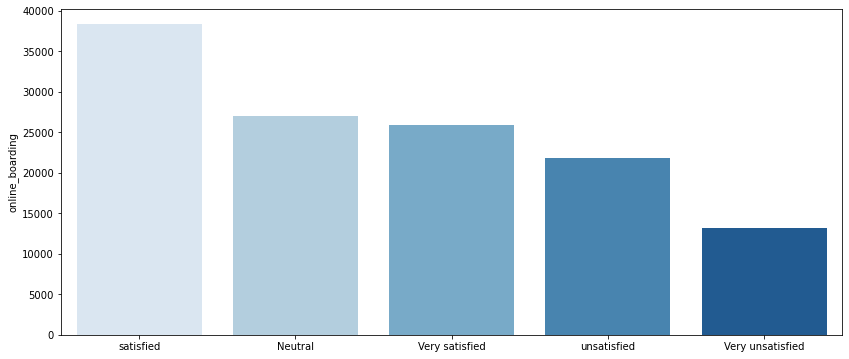

In [39]:
plt.figure(figsize=[14, 6])
sns.barplot( x=online.index, y=df['online_boarding'].value_counts(),palette="Blues");

In [40]:
delay = df.departure_delay.value_counts().head(9)

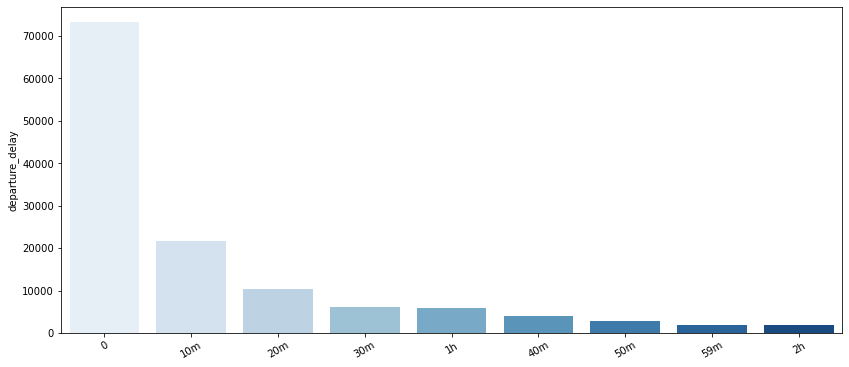

In [41]:
plt.figure(figsize=[14, 6])
sns.barplot( x=delay.index, y=df['departure_delay'].value_counts().head(9),palette="Blues");
plt.xticks(rotation = 30);

In [42]:
df

,Gender,customer_type,type_of_travel,customer_class,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction,departure_delay
0,Male,Loyal Customer,Personal Travel,Eco Plus,Neutral,Neutral,Very satisfied,Neutral,Very satisfied,Very satisfied,satisfied,Neutral,satisfied,satisfied,Very satisfied,Very satisfied,25,dissatisfied,30m
1,Male,disloyal Customer,Business travel,Business,Neutral,Neutral,Very unsatisfied,Neutral,Very unsatisfied,Very unsatisfied,Very unsatisfied,Very satisfied,Neutral,Very unsatisfied,satisfied,Very unsatisfied,1,dissatisfied,10m
2,Female,Loyal Customer,Business travel,Business,unsatisfied,unsatisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,satisfied,Neutral,satisfied,satisfied,satisfied,Very satisfied,0,satisfied,0
3,Female,Loyal Customer,Business travel,Business,unsatisfied,Very satisfied,unsatisfied,unsatisfied,unsatisfied,unsatisfied,unsatisfied,Very satisfied,Neutral,Very unsatisfied,satisfied,unsatisfied,11,dissatisfied,20m
4,Male,Loyal Customer,Business travel,Business,Neutral,Neutral,satisfied,Very satisfied,Very satisfied,Neutral,Neutral,satisfied,satisfied,Neutral,Neutral,Neutral,0,satisfied,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,Business travel,Business,Neutral,Neutral,satisfied,Neutral,satisfied,satisfied,Neutral,unsatisfied,satisfied,satisfied,Very satisfied,satisfied,0,dissatisfied,0
129876,Male,Loyal Customer,Business travel,Business,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,satisfied,0,satisfied,0
129877,Female,Loyal Customer,Personal Travel,Eco,unsatisfied,Very unsatisfied,unsatisfied,Very unsatisfied,unsatisfied,unsatisfied,satisfied,Neutral,satisfied,Very satisfied,satisfied,unsatisfied,0,dissatisfied,0
129878,Male,Loyal Customer,Business travel,Business,Neutral,Neutral,satisfied,satisfied,satisfied,satisfied,Neutral,unsatisfied,Very satisfied,satisfied,Very satisfied,satisfied,0,satisfied,0


 **For model**
---

In [43]:
df_model['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_model['customer_type'] = df['customer_type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)
df_model['type_of_travel'] = df['type_of_travel'].apply(lambda x: 1 if x == 'Business travel' else 0)

In [44]:
customer_class_transfer = {
    'Business' : 1 , 
    'Eco Plus' : 2 , 
    'Eco' : 3 
}

In [45]:
df_model['customer_class'] = df_model['customer_class'].map(customer_class_transfer)

In [46]:
df_model['satisfaction'].values[df_model['satisfaction'] == 'neutral or dissatisfied'] = 'dissatisfied'

In [47]:
df_model['satisfaction'] = df_model['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

In [48]:
df_model

,Gender,customer_type,type_of_travel,customer_class,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction
0,1,1,0,2,3,3,5,3,5,5,4,3,4,4,5,5,25,0
1,1,0,1,1,3,3,1,3,1,1,1,5,3,1,4,1,1,0
2,0,1,1,1,2,2,5,5,5,5,4,3,4,4,4,5,0,1
3,0,1,1,1,2,5,2,2,2,2,2,5,3,1,4,2,11,0
4,1,1,1,1,3,3,4,5,5,3,3,4,4,3,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,1,3,3,4,3,4,4,3,2,4,4,5,4,0,0
129876,1,1,1,1,4,4,4,4,4,4,4,5,5,5,5,4,0,1
129877,0,1,0,3,2,1,2,1,2,2,4,3,4,5,4,2,0,0
129878,1,1,1,1,3,3,4,4,4,4,3,2,5,4,5,4,0,1


In [49]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      129487 non-null  int64
 1   customer_type               129487 non-null  int64
 2   type_of_travel              129487 non-null  int64
 3   customer_class              129487 non-null  int64
 4   inflight_wifi_service       129487 non-null  int64
 5   ease_of_online_booking      129487 non-null  int64
 6   food_and_drink              129487 non-null  int64
 7   online_boarding             129487 non-null  int64
 8   seat_comfort                129487 non-null  int64
 9   inflight_entertainment      129487 non-null  int64
 10  onboard_service             129487 non-null  int64
 11  leg_room_service            129487 non-null  int64
 12  baggage_handling            129487 non-null  int64
 13  checkin_service             129487 non-null 

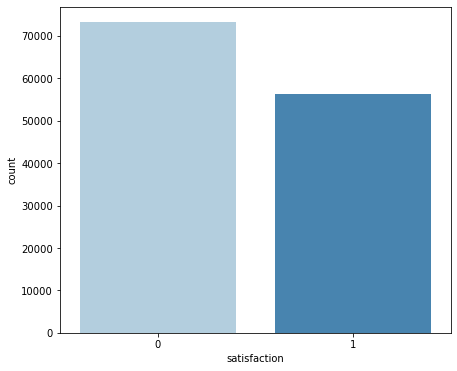

In [162]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(7, 6));
sns.countplot(df_model['satisfaction'],palette="Blues");

In [51]:
X = df_model.drop(['satisfaction'],axis=1)
y = df_model['satisfaction']

In [52]:
X

,Gender,customer_type,type_of_travel,customer_class,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes
0,1,1,0,2,3,3,5,3,5,5,4,3,4,4,5,5,25
1,1,0,1,1,3,3,1,3,1,1,1,5,3,1,4,1,1
2,0,1,1,1,2,2,5,5,5,5,4,3,4,4,4,5,0
3,0,1,1,1,2,5,2,2,2,2,2,5,3,1,4,2,11
4,1,1,1,1,3,3,4,5,5,3,3,4,4,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,1,3,3,4,3,4,4,3,2,4,4,5,4,0
129876,1,1,1,1,4,4,4,4,4,4,4,5,5,5,5,4,0
129877,0,1,0,3,2,1,2,1,2,2,4,3,4,5,4,2,0
129878,1,1,1,1,3,3,4,4,4,4,3,2,5,4,5,4,0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [54]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (103589, 17)
X_test: (25898, 17)
y_train: (103589,)
y_test: (25898,)


## Classificatons

## 1. K – Nearest Neighbor (KNN) Classification

In [55]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [56]:
knn = KNeighborsClassifier(algorithm='brute', n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=11)

In [57]:
#Prediction of test set
y_pred = knn.predict(X_test)
#print the predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [1 0 0 ... 1 1 0]


In [58]:
model = confusion_matrix(y_test, y_pred)
print(model)

[[14238   430]
 [ 1348  9882]]


In [59]:
print("Report : ",classification_report(y_test, y_pred ))

Report :                precision    recall  f1-score   support

           0       0.91      0.97      0.94     14668
           1       0.96      0.88      0.92     11230

    accuracy                           0.93     25898
   macro avg       0.94      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898



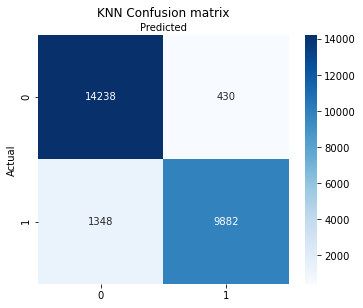

In [60]:
knn_cm = confusion_matrix(y_test, y_pred)
class_names=[0, 1] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(knn_cm), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names);

## 2. Logistic Classification

In [61]:
lor_clf = LogisticRegression(solver='liblinear')

## fit the model with "train_x" and "train_y"
lor_clf.fit(X_train,y_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_predict_logistic = lor_clf.predict(X_test)

#Classification_report:
print("Report : ",classification_report(y_test, y_predict_logistic))

Report :                precision    recall  f1-score   support

           0       0.88      0.90      0.89     14668
           1       0.87      0.84      0.85     11230

    accuracy                           0.87     25898
   macro avg       0.87      0.87      0.87     25898
weighted avg       0.87      0.87      0.87     25898



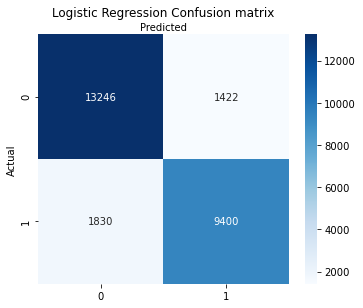

In [62]:
cm = confusion_matrix(y_test, y_predict_logistic)
class_names=[0, 1] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logistic Regression Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names);

## 3. Decision Tree

In [63]:
#Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=12)

#Train Decision Tree Classifer
dt_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predict_decision = dt_clf.predict(X_test)

In [64]:
#Classification_report:
print("Report:",classification_report(y_test, y_predict_decision))

Report:               precision    recall  f1-score   support

           0       0.94      0.97      0.96     14668
           1       0.96      0.92      0.94     11230

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



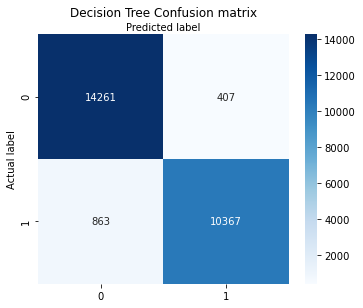

In [65]:
dec_cm = confusion_matrix(y_test, y_predict_decision)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(dec_cm), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names);

## 4. Random Forest

In [121]:
## for test selcshen

clf = RandomForestClassifier(criterion='entropy')
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train,y_train)
# performing predictions on the test dataset
y_predict_randem = clf.predict(X_test)

In [122]:
#Classification report: 
print("Report : ",classification_report(y_test, y_predict_randem))

Report :                precision    recall  f1-score   support

           0       0.95      0.97      0.96     14668
           1       0.97      0.94      0.95     11230

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



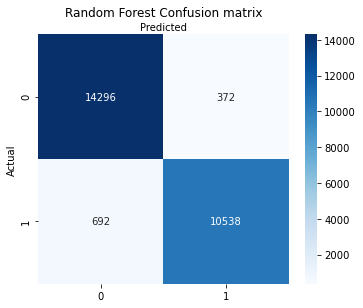

In [123]:
rf_cm = confusion_matrix(y_test, y_predict_randem)
class_names=[0, 1] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(rf_cm), annot=True, cmap="Blues", fmt='g')
#YlGnBu
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Random Forest Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names);

## 5. Xgboost Classification

In [164]:
warnings.filterwarnings('ignore')
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb_clf = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb_clf.fit(X_train,y_train)
y_predict_xgboost = xgb_clf.predict(X_test)

[22:33:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [73]:
print("Report : ",classification_report(y_test, y_predict_xgboost))

Report :                precision    recall  f1-score   support

           0       0.91      0.95      0.93     14668
           1       0.92      0.87      0.90     11230

    accuracy                           0.91     25898
   macro avg       0.92      0.91      0.91     25898
weighted avg       0.92      0.91      0.91     25898



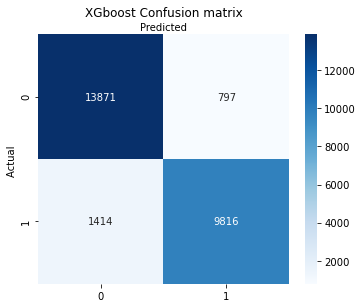

In [166]:
cm = confusion_matrix(y_test, y_predict_xgboost)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('XGboost Confusion matrix')
plt.ylabel('Actual ')
plt.xlabel('Predicted')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names);

## 6. Support Vector Machine

In [75]:
#Create a svm Classifier
svm_clf = svm.SVC(C=10,kernel='rbf',gamma=0.01) 

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_predict_support = svm_clf.predict(X_test)

In [76]:
#Classification report: 
print("Report : ",classification_report(y_test, y_predict_support))

Report :                precision    recall  f1-score   support

           0       0.94      0.96      0.95     14668
           1       0.95      0.93      0.94     11230

    accuracy                           0.95     25898
   macro avg       0.95      0.94      0.94     25898
weighted avg       0.95      0.95      0.95     25898



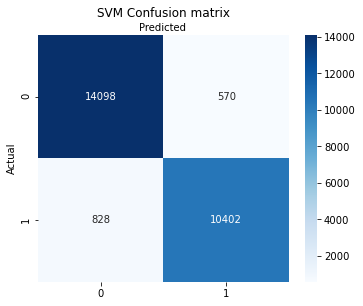

In [77]:
True_False = confusion_matrix(y_test, y_predict_support)
cm =[0, 1] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(True_False), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted ')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, cm)
plt.yticks(tick_marks, cm);

## 7. Stacking Classifier

In [165]:
warnings.filterwarnings('ignore')

knn = KNeighborsClassifier(algorithm='brute', n_neighbors=11)
lor_clf = LogisticRegression(solver='liblinear')
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=12)
rf_clf = RandomForestClassifier(criterion='entropy')
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
svm_clf = svm.SVC(C=10,kernel='rbf',gamma=0.01) 

# Get these models in a list
estimators = [('KNN', knn),
              ('LogisticRegression', lor_clf),
              ('DecisionTreeClassifier', dt_clf),
              ('RandomForestClassifier', rf_clf),
              ('xgboost', xg_reg),
              ('Support Vector Machine', svm_clf),
             ]
#Stack these models with StackingRegressor
stacking_clf = StackingClassifier(estimators=estimators) #,final_estimator=lr
stacking_clf.fit(X_train,y_train)
y_predict_stacking = stacking_clf.predict(X_test)

[22:34:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:40:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c09

In [168]:
print(classification_report(y_test, y_predict_stacking))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14668
           1       0.96      0.94      0.95     11230

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



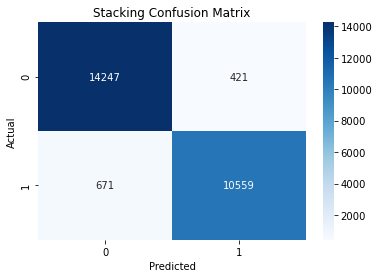

In [167]:
matrix = confusion_matrix(y_test, y_predict_stacking)
sns.heatmap(matrix, annot=True, fmt="d",cmap='Blues');
plt.title('Stacking Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

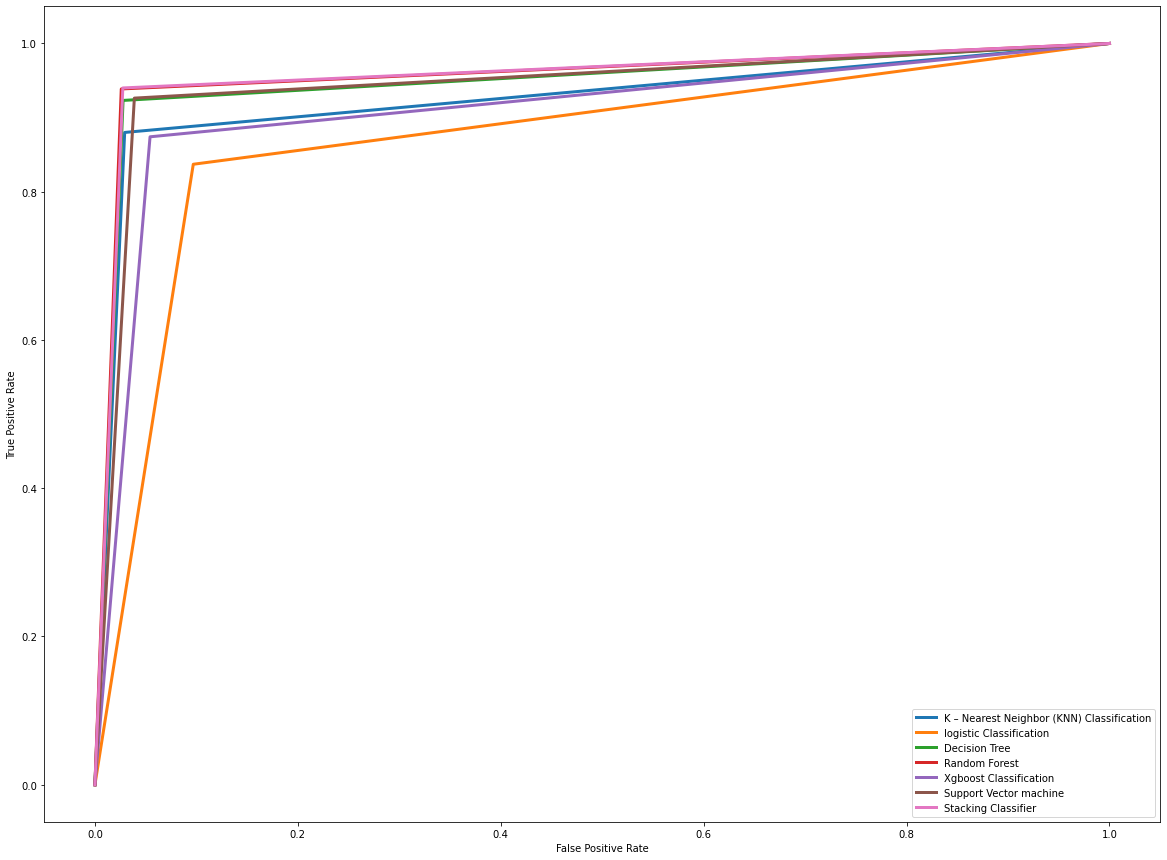

In [85]:
# K – Nearest Neighbor (KNN) Classification
kr_auc = roc_auc_score(y_test, y_pred)
kr_fpr, kr_tpr, _ = roc_curve(y_test, y_pred)

# logistic classification**
lt_auc = roc_auc_score(y_test, y_predict_logistic)
lt_fpr, lt_tpr, _ = roc_curve(y_test, y_predict_logistic)

# Decision tree
dr_auc = roc_auc_score(y_test, y_predict_decision)
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_predict_decision)

# Random Forest
rr_auc = roc_auc_score(y_test, y_predict_randem)
rt_fpr, rt_tpr, _ = roc_curve(y_test, y_predict_randem)

# Xgboost classification
xgr_auc = roc_auc_score(y_test, y_predict_xgboost)
xgt_fpr, xgt_tpr, _  = roc_curve(y_test, y_predict_xgboost)

# Support Vector machine
svm_auc = roc_auc_score(y_test, y_predict_support)
svm_fpr, svm_tpr, _  = roc_curve(y_test, y_predict_support)   
    
# Stacking Classifier
st_auc = roc_auc_score(y_test, y_predict_stacking)
st_fpr, st_tpr, _  = roc_curve(y_test, y_predict_stacking)
plt.figure(figsize=(20, 15))


plt.plot(kr_fpr, kr_tpr,  label='K – Nearest Neighbor (KNN) Classification',linewidth = 3)
plt.plot(lt_fpr, lt_tpr, label='logistic Classification',linewidth = 3)
plt.plot(dt_fpr, dt_tpr,  label='Decision Tree',linewidth = 3)
plt.plot(rt_fpr, rt_tpr, label='Random Forest',linewidth = 3)
plt.plot(xgt_fpr, xgt_tpr, label='Xgboost Classification',linewidth = 3)
plt.plot(svm_fpr, svm_tpr, label='Support Vector machine',linewidth = 3)
plt.plot(st_fpr, st_tpr, label='Stacking Classifier',linewidth = 3)

#y_predict_logistic
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

## Select Best Features

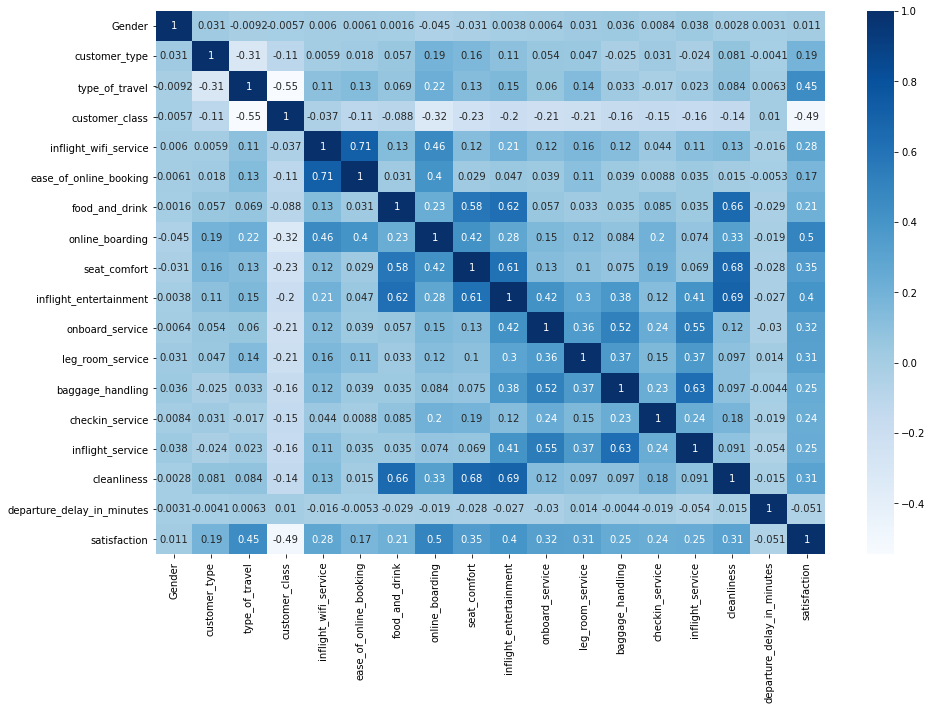

In [86]:
df_matrix = pd.concat([X,y],axis= 1)
corr_matrix =df_matrix.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(df_matrix[top_corr_features].corr(),annot=True,cmap="Blues")

In [98]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=17)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(17,'Score'))  #print 17 best features

                      Features         Score
16  departure_delay_in_minutes  33135.220124
7              online_boarding  18273.122258
3               customer_class  14807.210713
9       inflight_entertainment  10890.229395
2               type_of_travel   8101.078880
8                 seat_comfort   7955.338267
4        inflight_wifi_service   6729.166336
10             onboard_service   6586.773161
11            leg_room_service   6538.762624
15                 cleanliness   6403.763379
13             checkin_service   3530.917011
6               food_and_drink   3186.533215
12            baggage_handling   3069.708745
14            inflight_service   2954.850199
5       ease_of_online_booking   2626.391764
1                customer_type    819.748874
0                       Gender      8.683365


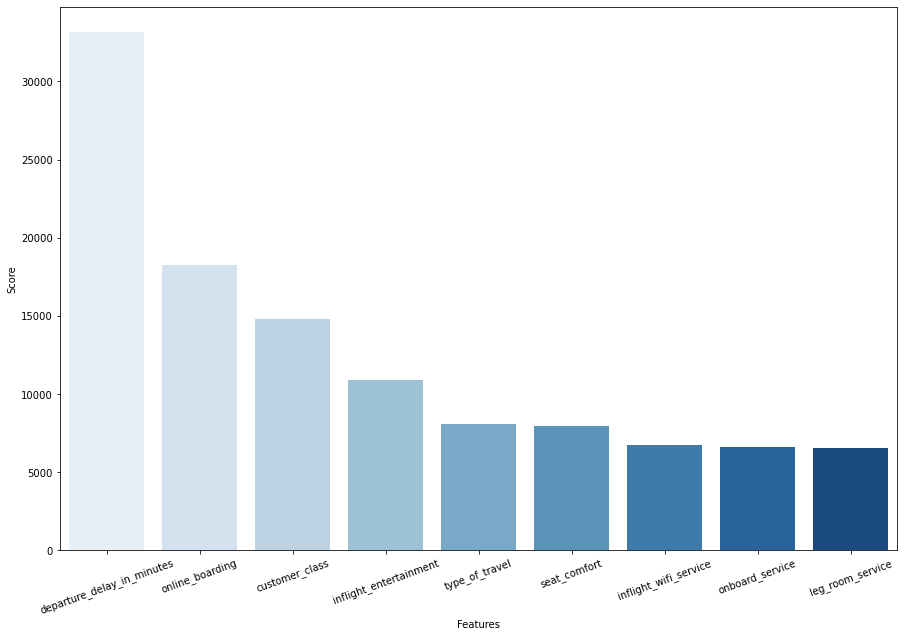

In [99]:
plt.figure(figsize=[15, 10])
featureScores = featureScores.sort_values(ascending=False, by= 'Score')
sns.barplot(x=featureScores.Features.head(9) , y=featureScores.Score.head(9), palette="Blues");
plt.xticks(rotation=20);

In [89]:
X_feature = X.copy()
y_feature = y.copy()

In [100]:
X_feature.drop(['checkin_service','food_and_drink','baggage_handling','inflight_service','ease_of_online_booking','customer_type','Gender'],axis=1,inplace=True)

KeyError: "['checkin_service' 'food_and_drink' 'baggage_handling' 'inflight_service'\n 'ease_of_online_booking' 'customer_type' 'Gender'] not found in axis"

In [101]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_feature, y_feature, test_size = 0.2,random_state=42)

In [102]:
sc = StandardScaler()
Xf_train = sc.fit_transform(Xf_train)
Xf_test = sc.transform (Xf_test)

## Selecting best features

## 1. KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(algorithm='brute', n_neighbors=11)
knn_clf.fit(Xf_train,yf_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=11)

In [138]:
#Prediction of test set
yf_pred = knn_clf.predict(Xf_test)
#print the predicted values
print("Prediction for test set: {}".format(yf_pred))

Prediction for test set: [1 0 0 ... 1 1 0]


In [139]:
print("Report : ",classification_report(yf_test, yf_pred ))

Report :                precision    recall  f1-score   support

           0       0.92      0.95      0.94     14668
           1       0.94      0.89      0.91     11230

    accuracy                           0.93     25898
   macro avg       0.93      0.92      0.93     25898
weighted avg       0.93      0.93      0.93     25898



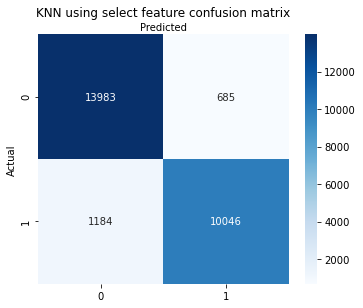

In [140]:
knn_cm = confusion_matrix(yf_test, yf_pred)
class_names=[0, 1] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(knn_cm), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN using select feature confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names);

## 2.Logistic Regression

In [109]:
lor_clf = LogisticRegression(solver='liblinear')

## fit the model with "train_x" and "train_y"
lor_clf.fit(Xf_train,yf_train)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 
yf_predict_logistic = lor_clf.predict(Xf_test)

#Classification_report:
print("Report : ",classification_report(yf_test, yf_predict_logistic))

Report :                precision    recall  f1-score   support

           0       0.86      0.88      0.87     14668
           1       0.84      0.82      0.83     11230

    accuracy                           0.85     25898
   macro avg       0.85      0.85      0.85     25898
weighted avg       0.85      0.85      0.85     25898



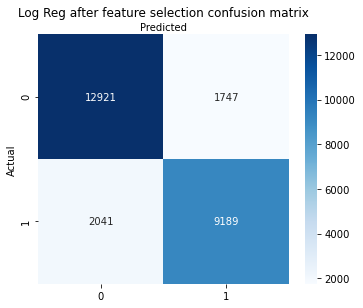

In [111]:
cm = confusion_matrix(yf_test, yf_predict_logistic)
class_names=[0, 1] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Log Reg after feature selection confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names);

## 3. Decision Tree

In [112]:
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=12)

#Train Decision Tree Classifer
dt_clf.fit(Xf_train,yf_train)

#Predict the response for test dataset
yf_predict_decision = dt_clf.predict(Xf_test)

In [113]:
print("Report:",classification_report(yf_test, yf_predict_decision))

Report:               precision    recall  f1-score   support

           0       0.93      0.96      0.94     14668
           1       0.94      0.91      0.93     11230

    accuracy                           0.94     25898
   macro avg       0.94      0.93      0.93     25898
weighted avg       0.94      0.94      0.94     25898



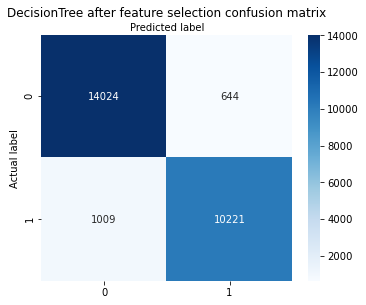

In [114]:
dec_cm = confusion_matrix(yf_test, yf_predict_decision)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(dec_cm), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('DecisionTree after feature selection confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names);

## 4. Random Forest

In [124]:
clf = RandomForestClassifier(criterion='entropy')
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(Xf_train,yf_train)
# performing predictions on the test dataset
yf_predict_randem = clf.predict(Xf_test)

In [125]:
accuracy_score(yf_test,yf_predict_randem)
# using metrics module for accuracy calculation
print("Report : ",classification_report(yf_test, yf_predict_randem))

Report :                precision    recall  f1-score   support

           0       0.94      0.95      0.94     14668
           1       0.93      0.92      0.93     11230

    accuracy                           0.94     25898
   macro avg       0.94      0.93      0.93     25898
weighted avg       0.94      0.94      0.94     25898



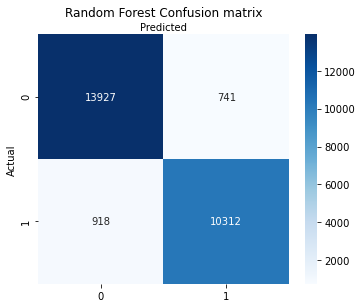

In [127]:
rf_cm = confusion_matrix(yf_test, yf_predict_randem)
class_names=[0, 1] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(rf_cm), annot=True, cmap="Blues", fmt='g')
#YlGnBu
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('RF after feature selection confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names);

## 5. XGboost

In [129]:
warnings.filterwarnings('ignore')
scaler = StandardScaler()
Xf_train = scaler.fit_transform(Xf_train)
Xf_test = scaler.transform(Xf_test)

xgb_clf = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb_clf.fit(Xf_train,yf_train)
yf_predict_xgboost = xgb_clf.predict(Xf_test)

/Users/aljoharahabdullaziz/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:52:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [130]:
print("Report : ",classification_report(yf_test, yf_predict_xgboost))

Report :                precision    recall  f1-score   support

           0       0.86      0.92      0.89     14668
           1       0.89      0.81      0.85     11230

    accuracy                           0.87     25898
   macro avg       0.88      0.87      0.87     25898
weighted avg       0.88      0.87      0.87     25898



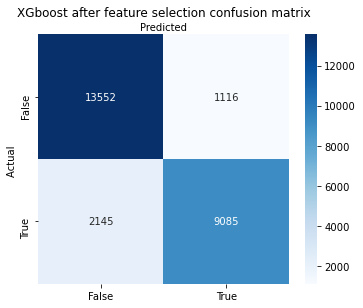

In [132]:
xgb_cm = confusion_matrix(yf_test, yf_predict_xgboost)
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(xgb_cm), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('XGboost after feature selection confusion matrix')
plt.ylabel('Actual ')
plt.xlabel('Predicted')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names);

## 6. Support Vector Machine

In [134]:
#Create a svm Classifier
svm_clf = svm.SVC(C=10,kernel='rbf',gamma=0.01) 

#Train the model using the training sets
svm_clf.fit(Xf_train, yf_train)

#Predict the response for test dataset
yf_predict_support = svm_clf.predict(Xf_test)

In [135]:
#Classification report: 
print("Report : ",classification_report(yf_test, yf_predict_support))

Report :                precision    recall  f1-score   support

           0       0.93      0.93      0.93     14668
           1       0.91      0.91      0.91     11230

    accuracy                           0.92     25898
   macro avg       0.92      0.92      0.92     25898
weighted avg       0.92      0.92      0.92     25898



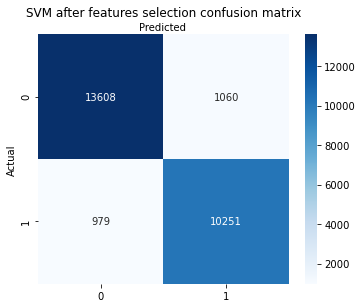

In [136]:
svm_cm = confusion_matrix(yf_test, yf_predict_support)
cm =[0, 1] # name  of classes
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(pd.DataFrame(svm_cm), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('SVM after features selection confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted ')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, cm)
plt.yticks(tick_marks, cm);

## Stacking best feature selection

In [142]:
warnings.filterwarnings('ignore')
knn_clf = KNeighborsClassifier(algorithm='brute', n_neighbors=11)
lor_clf = LogisticRegression(solver='liblinear')
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=12)
rf_clf = RandomForestClassifier(criterion='entropy')
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
svm_clf = svm.SVC(C=10,kernel='rbf',gamma=0.01) 

# Get these models in a list
estimators = [('KNN', knn_clf),
              ('LogisticRegression', lor_clf),
              ('DecisionTreeClassifier', dt_clf),
              ('RandomForestClassifier', rf_clf),
              ('xgboost', xg_reg),
              ('Support Vector Machine', svm_clf),
             ]
#Stack these models with StackingRegressor
stacking_clf = StackingClassifier(estimators=estimators) #,final_estimator=lr
stacking_clf.fit(Xf_train,yf_train)
yf_predict_stacking = stacking_clf.predict(Xf_test)

/Users/aljoharahabdullaziz/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:06:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/aljoharahabdullaziz/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/aljoharahabdullaziz/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:11:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/aljoharahabdullaziz/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/aljoharahabdullaziz/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[22:11:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


/Users/aljoharahabdullaziz/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [144]:
print(classification_report(yf_test, yf_predict_stacking))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14668
           1       0.94      0.92      0.93     11230

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898



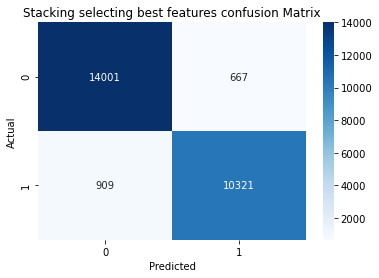

In [145]:
matrix = confusion_matrix(yf_test, yf_predict_stacking)
sns.heatmap(matrix, annot=True, fmt="d",cmap='Blues');
plt.title('Stacking selecting best features confusion matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');